In [2]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
#import matplotlib.pyplot as plt
#from matplotlib.ticker import FormatStrFormatter # Para formatear los ejes

from sklearn.model_selection import KFold # Para validar

from utilidades.graficar import ver_dispersion

In [3]:
train = pd.read_csv('data/train_limpio.csv')
#test = pd.read_csv('data/test_limpio.csv')

In [4]:
X = train.drop(columns=['precio'])
y = train['precio']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [6]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(180000, 70) (180000,)
(60000, 70) (60000,)


# Random Forest Classifier

In [7]:
%%time
rfr = RandomForestRegressor(n_estimators=100, n_jobs=-1)
rfr.fit(X_train, y_train)

Wall time: 29.2 s


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                      oob_score=False, random_state=None, verbose=0,
                      warm_start=False)

### Predicción del y_test

In [8]:
prediction_t = rfr.predict(X_test)
mean_absolute_error(y_test, prediction_t)

677981.1924919747

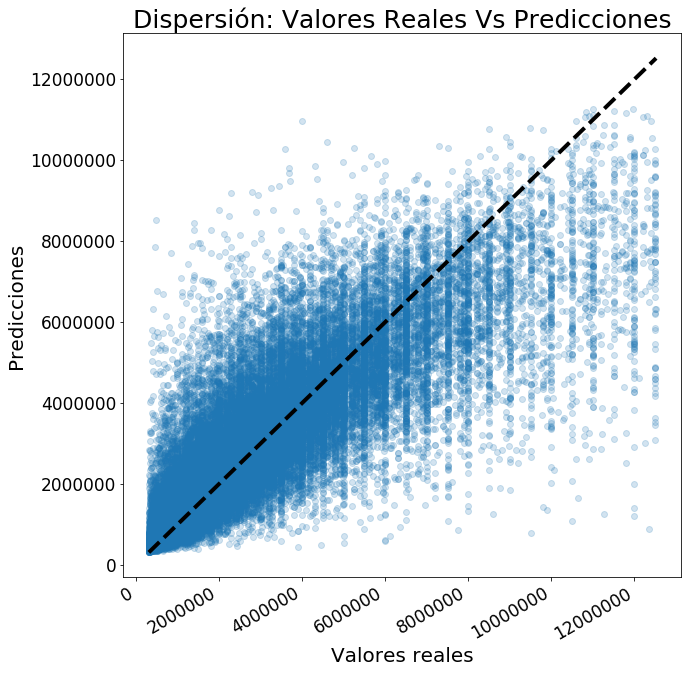

In [9]:
ver_dispersion(y_test, prediction_t)

# Validación  (variable para modelo a entrenar = rfr)

In [10]:
%%time
transf = True
kfold = KFold(5, True, 42)
for i, (train_index, test_index) in enumerate(kfold.split(X)):
    # Se parte el dataset en dos, train y test, con el train entreno
    # y con el test evaluo como predice mi algoritmo
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    if transf:
        y_train = np.log(y_train)
    # Me creo una instancia del modelo y luego lo entreno con los datos(con fit(X,y))
    rfr = RandomForestRegressor(n_estimators=100, n_jobs=-1)
    rfr.fit(X_train, y_train)
    predicciones_t = rfr.predict(X_test)
    if transf:
        predicciones_t = np.exp(predicciones_t)

    # Me fijo como me da el resultado
    print(f"Error de fold N°{i} es : {round(mean_absolute_error(y_test, predicciones_t), 2)}")

Error de fold N°0 es : 668186.52
Error de fold N°1 es : 660418.55
Error de fold N°2 es : 665925.18
Error de fold N°3 es : 663284.03
Error de fold N°4 es : 658424.26
Wall time: 2min 40s


# Predicción del test (para submit)

In [9]:
'''
test = pd.read_csv('data/test_limpio.csv')
y_pred = rfr.predict(test)
'''

# Generación de submit

In [11]:
'''
ids = pd.read_csv('data/test.csv', usecols=['id'])

submit = pd.DataFrame(y_pred, columns=['target'])
submit.insert(0, 'id', ids)
submit.to_csv(f"submits/submit_Rand_Forest.csv", index=False)
'''